<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/Deeplab_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
# Install necessary libraries
!pip install torch torchvision transformers roboflow
from sklearn.metrics import precision_score, recall_score, f1_score
!pip install torch torchvision transformers roboflow tqdm scikit-learn
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
from roboflow import Roboflow
import os
import torch
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor
from roboflow import Roboflow
from torch.utils.data import DataLoader, Dataset
import os
import json
from PIL import Image
import numpy as np
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import os
import json
from PIL import Image
import cv2
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="Md29cWfzX6FKw6DNPDgf")
project = rf.workspace("rebar-exposure-and-spalling").project("aperi")
version = project.version(1)
dataset = version.download("coco-segmentation")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to aperi-1 in coco-segmentation:: 100%|██████████| 2073/2073 [00:00<00:00, 5121.59it/s]


**Check the labels/ folder contentst**

In [ ]:
# folders where the data
import os

base_dir = "/content/aperi-1"
print("Train folder:", os.listdir(os.path.join(base_dir, "train")))
print("Valid folder:", os.listdir(os.path.join(base_dir, "valid")))


Train folder: ['32439032_jpg.rf.ce62781bbd3826f6eb58db87183a63bf.jpg', '9583566_jpg.rf.429a21afe2355834e118677f1b588355.jpg', '124_jpg.rf.1fef00035c686fb1757c30b0e23886a5.jpg', '32439297_jpg.rf.db24a2ba9da52d4bd42a4afb63211b31.jpg', '9584021_jpg.rf.8bcc05fd9990ef1576bfb026ae395d4a.jpg', '533_jpg.rf.869f8fd7c38c054545b8b805c7f730bb.jpg', '447_jpg.rf.20828e709c41c968804b8b5391824870.jpg', '9583712_jpg.rf.94fd064ed7ecf80ac892330d8e8e4bcb.jpg', '32439282_jpg.rf.b9d04099dd69aa4510317eace9ca8ee1.jpg', '9583933_jpg.rf.385028ecce35f9f2ac05add3c377c0c9.jpg', '9583890_jpg.rf.e94ef574caf27d4fc04b5f360f0e8d10.jpg', '9583922_jpg.rf.3f7fa831c12d960001fa6ad3c4bf0eb6.jpg', '56_jpg.rf.864f4f2f9c50e721e2f9fb6658fb49a0.jpg', '9583723_jpg.rf.598dad0fb68730a58945445616be4d96.jpg', '32439171_jpg.rf.5b199a9e0dd890978521f8c65b08bb73.jpg', '32439137_jpg.rf.d44012d49046fd08b2d7a2d971ea308c.jpg', '497_jpg.rf.7dfd8db29feea809994be121edfae4de.jpg', '9584029_jpg.rf.347fa3d093806d65e5ab1478d939eeb4.jpg', '302_jpg.rf

In [ ]:
!ls /content/aperi-1


README.dataset.txt  README.roboflow.txt  train	valid


In [ ]:
!find /content/aperi-1 -name "*.json"


/content/aperi-1/train/_annotations.coco.json
/content/aperi-1/valid/_annotations.coco.json


In [ ]:
!ls /content/aperi-1/train
!ls /content/aperi-1/valid


100_jpg.rf.34e54dff0f77c9f6e5685b037353fd46.jpg
100_jpg.rf.3563e64a053a73cd5e264315f4bcd829.jpg
101_jpg.rf.34cfb18c3b156a642b2695659cf58d0d.jpg
101_jpg.rf.845d3e8914bce0d40f36ab701158e097.jpg
102_jpg.rf.94ab5b6bf26990c2f403501ebe8678f3.jpg
102_jpg.rf.c6259a85048ed827157564ea6ee54203.jpg
103_jpg.rf.149f2727bfd27e0968455e1851e1df79.jpg
103_jpg.rf.d753a3c73b24cbdb5e356b8f5c0c9637.jpg
104_jpg.rf.1653c069b6baad49dea78da19d669371.jpg
104_jpg.rf.e6c4fe34e3e4e1185d309360b62b4afd.jpg
105_jpg.rf.4ad93806cefa150a4a8bb14477688c11.jpg
105_jpg.rf.70293e8b7526414b040da078d43c6a2a.jpg
106_jpg.rf.beb054b07cab1250208eeeb2e0aacbcb.jpg
106_jpg.rf.c19c04b1f2041aa4e56c9799319a3af0.jpg
107_jpg.rf.c9d9ca069947360deb611a86bb9ebd90.jpg
107_jpg.rf.ef2219d0c4bfae1f24d452dc06333c80.jpg
108_jpg.rf.5c0b06af9210560d69501d3c3d8b4ccc.jpg
108_jpg.rf.a31453aff3c622d9e64857fd81194d15.jpg
109_jpg.rf.b56c818a7a26626e779c53cc0d807963.jpg
10_jpg.rf.5731b676f8d8316fb52d07556d152666.jpg
10_jpg.rf.9c8ceb1ee52f133cde733f970e4b412

#json file convert into the mask

In [ ]:
import os
import json
import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
from PIL import Image

def coco_to_masks(coco_json_path, images_dir, masks_dir):
    os.makedirs(masks_dir, exist_ok=True)

    coco = COCO(coco_json_path)
    img_ids = coco.getImgIds()

    for img_id in img_ids:
        img_info = coco.loadImgs(img_id)[0]
        img_name = img_info['file_name']
        width, height = img_info['width'], img_info['height']

        # Initialize mask image (height x width) with background 0
        mask = np.zeros((height, width), dtype=np.uint8)

        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)

        for ann in anns:
            class_id = ann['category_id']  # You may want to map category IDs if needed
            seg = ann['segmentation']

            if type(seg) == list:
                # Polygon
                rles = maskUtils.frPyObjects(seg, height, width)
                rle = maskUtils.merge(rles)
            elif type(seg['counts']) == list:
                # Uncompressed RLE
                rle = maskUtils.frPyObjects(seg, height, width)
            else:
                # RLE
                rle = seg

            m = maskUtils.decode(rle)
            mask[m == 1] = class_id

        # Save mask as PNG
        mask_img = Image.fromarray(mask)
        mask_filename = os.path.splitext(img_name)[0] + '.png'
        mask_img.save(os.path.join(masks_dir, mask_filename))

    print("Mask images saved to", masks_dir)


In [ ]:
#generate the train_mask
coco_json_path = "/content/aperi-1/train/_annotations.coco.json"
images_dir = "/content/aperi-1/train"
masks_dir = "/content/aperi-1/train_masks"

coco_to_masks(coco_json_path, images_dir, masks_dir)


loading annotations into memory...
Done (t=0.28s)
creating index...
index created!
Mask images saved to /content/aperi-1/train_masks


In [ ]:
#generate the valid_mask
coco_json_path = "/content/aperi-1/valid/_annotations.coco.json"
images_dir = "/content/aperi-1/valid"
masks_dir = "/content/aperi-1/valid_masks"

coco_to_masks(coco_json_path, images_dir, masks_dir)


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Mask images saved to /content/aperi-1/valid_masks


#

In [ ]:
import os

image_dir = "/content/aperi-1/train"
mask_dir = "/content/aperi-1/train_masks"  # assuming masks are here too

# List image and mask files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])
mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith('.png')])

print("Images:", image_files[:5])
print("Masks:", mask_files[:5])


Images: ['100_jpg.rf.34e54dff0f77c9f6e5685b037353fd46.jpg', '100_jpg.rf.3563e64a053a73cd5e264315f4bcd829.jpg', '101_jpg.rf.34cfb18c3b156a642b2695659cf58d0d.jpg', '101_jpg.rf.845d3e8914bce0d40f36ab701158e097.jpg', '102_jpg.rf.94ab5b6bf26990c2f403501ebe8678f3.jpg']
Masks: ['100_jpg.rf.34e54dff0f77c9f6e5685b037353fd46.png', '100_jpg.rf.3563e64a053a73cd5e264315f4bcd829.png', '101_jpg.rf.34cfb18c3b156a642b2695659cf58d0d.png', '101_jpg.rf.845d3e8914bce0d40f36ab701158e097.png', '102_jpg.rf.94ab5b6bf26990c2f403501ebe8678f3.png']


In [ ]:
import os

image_dir = '/content/aperi-1/train'
mask_dir = '/content/aperi-1/train_masks'

images = sorted(os.listdir(image_dir))
masks = sorted(os.listdir(mask_dir))

print(f"Number of images: {len(images)}")
print(f"Number of masks: {len(masks)}")


Number of images: 1861
Number of masks: 1860


In [ ]:
# to check which images does not have the mask
import os

image_dir = '/content/aperi-1/train'
mask_dir = '/content/aperi-1/train_masks'

images = sorted(os.listdir(image_dir))
masks = sorted(os.listdir(mask_dir))

image_basenames = set(os.path.splitext(f)[0] for f in images)
mask_basenames = set(os.path.splitext(f)[0] for f in masks)

missing_masks = image_basenames - mask_basenames
print("Images missing masks:", missing_masks)


Images missing masks: {'_annotations.coco'}


In [ ]:
#Remove or move the _annotations.coco file from the masks folder
!rm /content/aperi-1/train_masks/_annotations.coco


rm: cannot remove '/content/aperi-1/train_masks/_annotations.coco': No such file or directory


In [ ]:
# after removing or replacing another place dataset checking
import os

image_dir = '/content/aperi-1/train'
mask_dir = '/content/aperi-1/train_masks'

images = sorted(os.listdir(image_dir))
masks = sorted(os.listdir(mask_dir))

image_basenames = set(os.path.splitext(f)[0] for f in images)
mask_basenames = set(os.path.splitext(f)[0] for f in masks)

missing_masks = image_basenames - mask_basenames
print("Images missing masks:", missing_masks)

Images missing masks: {'_annotations.coco'}


In [ ]:
#After removing checking the length of train and train_masks are equal
import os

image_dir = '/content/aperi-1/train'
mask_dir = '/content/aperi-1/train_masks'

images = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
masks = [f for f in os.listdir(mask_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Number of images: {len(images)}")
print(f"Number of masks: {len(masks)}")

missing_masks = set(images) - set(masks)
if missing_masks:
    print(f"Images missing masks: {missing_masks}")
else:
    print("All images have corresponding masks!")


Number of images: 1860
Number of masks: 1860
Images missing masks: {'32439314_jpg.rf.3d26367dd9c30a8610277d4e3fdeab72.jpg', '366_jpg.rf.19cb029a5a692fcd5cf3550edcd6ba31.jpg', '389_jpg.rf.50b1be3b24086f08d56fb80924a61994.jpg', '9583938_jpg.rf.2d6b11e36cdc51ef4030fdd18a842e2b.jpg', '32439103_jpg.rf.d2bacbeb01636f6769353e213f8f0950.jpg', '482_jpg.rf.1f4499863d0f2e9cb70967ba38018644.jpg', '237_jpg.rf.beeaea56b5b45b2408a82ad570a408c6.jpg', '9583759_jpg.rf.ab4d580ec60331979f31644719199964.jpg', '18_jpg.rf.c671df4d94280c4ed32cebf25ca5bd2c.jpg', '320_jpg.rf.19fba69645bf3e53417114e9289856a9.jpg', '32439082_jpg.rf.0deebc7f5c11a18ec4972841d86f369f.jpg', '487_jpg.rf.2a5fec1b3ce9e8792479dc0efc9b26c4.jpg', '101_jpg.rf.845d3e8914bce0d40f36ab701158e097.jpg', '32439017_jpg.rf.3eef4c29a0229b7dcd688b2faccec619.jpg', '56_jpg.rf.34e70ae849308c5bdeaf79311332bc84.jpg', '306_jpg.rf.960962950d3e34584c5ef2c395d43738.jpg', '493_jpg.rf.27a3bf673232f69f1de96d1c38142ccf.jpg', '9583618_jpg.rf.f5fbea1b137d1d7531d321e

#Step 4: Apply DeepLabV3 Segmentation

#images missing masks are still available thats why rather than removing we can use the augmentation

**Dataset class with albumentations transforms**

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transforms = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

val_transforms = A.Compose([
    A.Resize(512, 512),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])




In [ ]:

import torch
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import os

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transforms=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transforms = transforms

        self.image_mask_pairs = []
        image_files = sorted(os.listdir(image_dir))
        mask_files = sorted(os.listdir(mask_dir))

        image_set = set(os.path.splitext(f)[0] for f in image_files)
        mask_set = set(os.path.splitext(f)[0] for f in mask_files)
        common_files = image_set.intersection(mask_set)

        for fname in common_files:
            image_path = os.path.join(image_dir, fname + ".jpg")  # or .png
            mask_path = os.path.join(mask_dir, fname + ".png")    # mask must match
            self.image_mask_pairs.append((image_path, mask_path))

        if len(self.image_mask_pairs) == 0:
            raise ValueError(" No valid image–mask pairs found.")

    def __len__(self):
        return len(self.image_mask_pairs)

    def __getitem__(self, idx):
        image_path, mask_path = self.image_mask_pairs[idx]

        image = np.array(Image.open(image_path).convert("RGB"))
        mask = np.array(Image.open(mask_path))

        # Apply albumentations transforms
        if self.transforms:
            augmented = self.transforms(image=image, mask=mask)
            image = augmented["image"]
            mask = augmented["mask"]

        return image.float(), mask.long()





In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load weights and model
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)

# Change classifier to match your 5 classes
model.classifier[-1] = torch.nn.Conv2d(256, 5, kernel_size=(1, 1))

# Move to device
model = model.to(device)

# ✅ Define Albumentations-style compatible transform
# This gives you the official image normalization and resize transforms
preprocess = weights.transforms()

# Print to verify
print(preprocess)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:00<00:00, 183MB/s]


SemanticSegmentation(
    resize_size=[520]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


**create dataloaders**

In [ ]:
# Define directories
train_image_dir = '/content/aperi-1/train'
train_mask_dir = '/content/aperi-1/train_masks'
val_image_dir = '/content/aperi-1/valid'
val_mask_dir = '/content/aperi-1/valid_masks'


# Create datasets

train_dataset = SegmentationDataset(train_image_dir, train_mask_dir, transforms=train_transforms)
val_dataset = SegmentationDataset(val_image_dir, val_mask_dir, transforms=val_transforms)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)


In [ ]:
import os

print("Files in /content:")
print(os.listdir("/content"))

print("\nFiles in /content/aperi-1 (if it exists):")
if os.path.exists("/content/aperi-1"):
    print(os.listdir("/content/aperi-1"))


Files in /content:
['.config', 'aperi-1', 'sample_data']

Files in /content/aperi-1 (if it exists):
['train', 'README.dataset.txt', 'README.roboflow.txt', 'valid_masks', 'valid', 'train_masks']


**Model + Loss + Optimizer Setup**

In [ ]:
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)

# Change classifier head for 5 classes
model.classifier[4] = torch.nn.Conv2d(256, 5, kernel_size=1)

# Move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
import torch.nn.functional as F
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


**Matrics**

In [ ]:
def compute_iou(preds, masks, num_classes):
    ious = []
    preds = preds.view(-1)
    masks = masks.view(-1)

    for cls in range(num_classes):
        pred_inds = preds == cls
        target_inds = masks == cls
        intersection = (pred_inds[target_inds]).long().sum().item()
        union = pred_inds.long().sum().item() + target_inds.long().sum().item() - intersection
        if union == 0:
            ious.append(float('nan'))  # Skip class if not present
        else:
            ious.append(intersection / union)
    return np.nanmean(ious)


**training for some epoch**

In [ ]:
"""from tqdm import tqdm
from tqdm import tqdm
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15, num_classes=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses, val_losses, val_ious = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)['out']
            outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)

            loss = criterion(outputs, masks)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        avg_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        ious = []

        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device)
                masks = masks.to(device)

                outputs = model(images)['out']
                outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)

                loss = criterion(outputs, masks)
                val_loss += loss.item() * images.size(0)

                preds = torch.argmax(outputs, dim=1)
                iou = compute_iou(preds, masks, num_classes)
                ious.append(iou)

        avg_val_loss = val_loss / len(val_loader.dataset)
        avg_iou = np.nanmean(ious)
        val_losses.append(avg_val_loss)
        val_ious.append(avg_iou)

        print(f"📘 Epoch [{epoch+1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f} | "
              f"Val Loss: {avg_val_loss:.4f} | mIoU: {avg_iou:.4f}")

    return model, train_losses, val_losses, val_ious
    """





In [ ]:
# above training call
"""model, train_losses, val_losses, val_ious = train_model(
    model, train_loader, val_loader,
    criterion, optimizer,
    num_epochs=15, num_classes=5
)
"""



Epoch 1/15: 100%|██████████| 233/233 [02:39<00:00,  1.46it/s]


📘 Epoch [1/15] | Train Loss: 0.7482 | Val Loss: 0.4201 | mIoU: 0.5179


Epoch 2/15: 100%|██████████| 233/233 [02:40<00:00,  1.45it/s]


📘 Epoch [2/15] | Train Loss: 0.3354 | Val Loss: 0.2687 | mIoU: 0.5864


Epoch 3/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [3/15] | Train Loss: 0.2426 | Val Loss: 0.2483 | mIoU: 0.5310


Epoch 4/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [4/15] | Train Loss: 0.1980 | Val Loss: 0.2208 | mIoU: 0.5849


Epoch 5/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [5/15] | Train Loss: 0.1763 | Val Loss: 0.2370 | mIoU: 0.5606


Epoch 6/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [6/15] | Train Loss: 0.1599 | Val Loss: 0.1903 | mIoU: 0.6351


Epoch 7/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [7/15] | Train Loss: 0.1495 | Val Loss: 0.1789 | mIoU: 0.6420


Epoch 8/15: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]


📘 Epoch [8/15] | Train Loss: 0.1271 | Val Loss: 0.1922 | mIoU: 0.6463


Epoch 9/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [9/15] | Train Loss: 0.1193 | Val Loss: 0.1796 | mIoU: 0.6497


Epoch 10/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [10/15] | Train Loss: 0.1220 | Val Loss: 0.1973 | mIoU: 0.6090


Epoch 11/15: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]


📘 Epoch [11/15] | Train Loss: 0.1125 | Val Loss: 0.1995 | mIoU: 0.6143


Epoch 12/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [12/15] | Train Loss: 0.1106 | Val Loss: 0.1857 | mIoU: 0.6293


Epoch 13/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [13/15] | Train Loss: 0.1042 | Val Loss: 0.1973 | mIoU: 0.6319


Epoch 14/15: 100%|██████████| 233/233 [02:41<00:00,  1.44it/s]


📘 Epoch [14/15] | Train Loss: 0.1113 | Val Loss: 0.1915 | mIoU: 0.6582


Epoch 15/15: 100%|██████████| 233/233 [02:42<00:00,  1.44it/s]


📘 Epoch [15/15] | Train Loss: 0.0876 | Val Loss: 0.1825 | mIoU: 0.6738


**Training+Save Best Model in train_model**

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

def compute_metrics(preds, labels, num_classes):
    preds = preds.cpu().numpy()
    labels = labels.cpu().numpy()

    ious, f1s, precisions, recalls = [], [], [], []

    for cls in range(num_classes):
        pred_cls = (preds == cls)
        label_cls = (labels == cls)

        intersection = np.logical_and(pred_cls, label_cls).sum()
        union = np.logical_or(pred_cls, label_cls).sum()
        iou = intersection / union if union != 0 else float('nan')
        ious.append(iou)

        tp = intersection
        fp = pred_cls.sum() - tp
        fn = label_cls.sum() - tp

        precision = tp / (tp + fp + 1e-7) if (tp + fp) > 0 else float('nan')
        recall = tp / (tp + fn + 1e-7) if (tp + fn) > 0 else float('nan')
        f1 = 2 * precision * recall / (precision + recall + 1e-7) if (precision + recall) > 0 else float('nan')

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    return np.nanmean(ious), np.nanmean(f1s), np.nanmean(precisions), np.nanmean(recalls)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15, num_classes=5, save_path='best_model.pth'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    train_losses, val_losses = [], []
    val_ious, val_f1s, val_precisions, val_recalls = [], [], [], []

    best_miou = 0.0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            images = images.to(device)
            masks = masks.to(device)

            optimizer.zero_grad()
            outputs = model(images)['out']
            outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)

            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        avg_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        ious, f1s, precisions, recalls = [], [], [], []

        with torch.no_grad():
            for images, masks in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                images = images.to(device)
                masks = masks.to(device)

                outputs = model(images)['out']
                outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)
                loss = criterion(outputs, masks)
                val_loss += loss.item() * images.size(0)

                preds = torch.argmax(outputs, dim=1)

                iou, f1, prec, rec = compute_metrics(preds, masks, num_classes)
                ious.append(iou)
                f1s.append(f1)
                precisions.append(prec)
                recalls.append(rec)

        avg_val_loss = val_loss / len(val_loader.dataset)
        avg_iou = np.nanmean(ious)
        avg_f1 = np.nanmean(f1s)
        avg_precision = np.nanmean(precisions)
        avg_recall = np.nanmean(recalls)

        val_losses.append(avg_val_loss)
        val_ious.append(avg_iou)
        val_f1s.append(avg_f1)
        val_precisions.append(avg_precision)
        val_recalls.append(avg_recall)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
        print(f"Val mIoU: {avg_iou:.4f} | F1: {avg_f1:.4f} | Precision: {avg_precision:.4f} | Recall: {avg_recall:.4f}")

        # Save best model by mIoU
        if avg_iou > best_miou:
            best_miou = avg_iou
            torch.save(model.state_dict(), save_path)
            print(f"Best model saved with mIoU: {best_miou:.4f}")

    history = {
        'train_loss': train_losses,
        'val_loss': val_losses,
        'val_miou': val_ious,
        'val_f1': val_f1s,
        'val_precision': val_precisions,
        'val_recall': val_recalls
    }

    return model, history



**Call training**

In [ ]:
model, history = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    num_epochs=100,
    num_classes=5,             # set according to your dataset
    save_path='best_deeplabv3.pth'
)



Epoch 1/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]


Epoch [1/100]
Train Loss: 0.0875 | Val Loss: 0.1971
Val mIoU: 0.6523 | F1: 0.7578 | Precision: 0.8584 | Recall: 0.7250
Best model saved with mIoU: 0.6523


Epoch 2/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]


Epoch [2/100]
Train Loss: 0.0884 | Val Loss: 0.1973
Val mIoU: 0.6643 | F1: 0.7685 | Precision: 0.8664 | Recall: 0.7319
Best model saved with mIoU: 0.6643


Epoch 3/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [3/100]
Train Loss: 0.0811 | Val Loss: 0.1919
Val mIoU: 0.6345 | F1: 0.7584 | Precision: 0.7974 | Recall: 0.7516


Epoch 4/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [4/100]
Train Loss: 0.0681 | Val Loss: 0.1812
Val mIoU: 0.6874 | F1: 0.7882 | Precision: 0.8531 | Recall: 0.7672
Best model saved with mIoU: 0.6874


Epoch 5/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [5/100]
Train Loss: 0.0671 | Val Loss: 0.1985
Val mIoU: 0.6814 | F1: 0.7757 | Precision: 0.8608 | Recall: 0.7604


Epoch 6/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [6/100]
Train Loss: 0.0746 | Val Loss: 0.2555
Val mIoU: 0.6333 | F1: 0.7502 | Precision: 0.8270 | Recall: 0.7214


Epoch 7/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.41it/s]


Epoch [7/100]
Train Loss: 0.0816 | Val Loss: 0.1924
Val mIoU: 0.6810 | F1: 0.7714 | Precision: 0.8839 | Recall: 0.7432


Epoch 8/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [8/100]
Train Loss: 0.0711 | Val Loss: 0.1985
Val mIoU: 0.6824 | F1: 0.7785 | Precision: 0.8660 | Recall: 0.7592


Epoch 9/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]


Epoch [9/100]
Train Loss: 0.0674 | Val Loss: 0.2202
Val mIoU: 0.6147 | F1: 0.7403 | Precision: 0.8089 | Recall: 0.7372


Epoch 10/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [10/100]
Train Loss: 0.0660 | Val Loss: 0.2150
Val mIoU: 0.6859 | F1: 0.7888 | Precision: 0.8366 | Recall: 0.7785


Epoch 11/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]


Epoch [11/100]
Train Loss: 0.0653 | Val Loss: 0.1770
Val mIoU: 0.6991 | F1: 0.7951 | Precision: 0.8558 | Recall: 0.7825
Best model saved with mIoU: 0.6991


Epoch 12/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]


Epoch [12/100]
Train Loss: 0.0648 | Val Loss: 0.1874
Val mIoU: 0.6892 | F1: 0.7924 | Precision: 0.8648 | Recall: 0.7567


Epoch 13/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [13/100]
Train Loss: 0.0588 | Val Loss: 0.1822
Val mIoU: 0.6922 | F1: 0.7886 | Precision: 0.8551 | Recall: 0.7710


Epoch 14/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]


Epoch [14/100]
Train Loss: 0.0572 | Val Loss: 0.2169
Val mIoU: 0.6733 | F1: 0.7868 | Precision: 0.8385 | Recall: 0.7635


Epoch 15/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [15/100]
Train Loss: 0.0600 | Val Loss: 0.2102
Val mIoU: 0.6832 | F1: 0.7891 | Precision: 0.8358 | Recall: 0.7856


Epoch 16/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [16/100]
Train Loss: 0.0550 | Val Loss: 0.2055
Val mIoU: 0.6906 | F1: 0.7951 | Precision: 0.8549 | Recall: 0.7717


Epoch 17/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]


Epoch [17/100]
Train Loss: 0.0577 | Val Loss: 0.1982
Val mIoU: 0.6902 | F1: 0.7930 | Precision: 0.8618 | Recall: 0.7690


Epoch 18/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [18/100]
Train Loss: 0.0916 | Val Loss: 0.2365
Val mIoU: 0.6132 | F1: 0.7304 | Precision: 0.8221 | Recall: 0.7035


Epoch 19/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [19/100]
Train Loss: 0.0860 | Val Loss: 0.1912
Val mIoU: 0.6619 | F1: 0.7674 | Precision: 0.8580 | Recall: 0.7478


Epoch 20/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.40it/s]


Epoch [20/100]
Train Loss: 0.0551 | Val Loss: 0.2196
Val mIoU: 0.6849 | F1: 0.7895 | Precision: 0.8611 | Recall: 0.7655


Epoch 21/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.34it/s]


Epoch [21/100]
Train Loss: 0.0567 | Val Loss: 0.2111
Val mIoU: 0.6677 | F1: 0.7899 | Precision: 0.8228 | Recall: 0.7755


Epoch 22/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [22/100]
Train Loss: 0.0496 | Val Loss: 0.1930
Val mIoU: 0.7001 | F1: 0.8018 | Precision: 0.8673 | Recall: 0.7768
Best model saved with mIoU: 0.7001


Epoch 23/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


Epoch [23/100]
Train Loss: 0.0451 | Val Loss: 0.2164
Val mIoU: 0.6992 | F1: 0.8016 | Precision: 0.8476 | Recall: 0.7833


Epoch 24/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [24/100]
Train Loss: 0.0528 | Val Loss: 0.2121
Val mIoU: 0.6821 | F1: 0.7743 | Precision: 0.8483 | Recall: 0.7580


Epoch 25/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [25/100]
Train Loss: 0.0479 | Val Loss: 0.2126
Val mIoU: 0.6898 | F1: 0.7928 | Precision: 0.8504 | Recall: 0.7614


Epoch 26/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [26/100]
Train Loss: 0.0441 | Val Loss: 0.2027
Val mIoU: 0.6915 | F1: 0.7963 | Precision: 0.8510 | Recall: 0.7657


Epoch 27/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [27/100]
Train Loss: 0.0444 | Val Loss: 0.2018
Val mIoU: 0.6774 | F1: 0.7904 | Precision: 0.8396 | Recall: 0.7759


Epoch 28/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [28/100]
Train Loss: 0.0815 | Val Loss: 0.2191
Val mIoU: 0.6351 | F1: 0.7540 | Precision: 0.8344 | Recall: 0.7242


Epoch 29/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [29/100]
Train Loss: 0.0796 | Val Loss: 0.1903
Val mIoU: 0.6699 | F1: 0.7859 | Precision: 0.8428 | Recall: 0.7581


Epoch 30/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [30/100]
Train Loss: 0.0499 | Val Loss: 0.1906
Val mIoU: 0.7081 | F1: 0.8057 | Precision: 0.8572 | Recall: 0.7874
Best model saved with mIoU: 0.7081


Epoch 31/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [31/100]
Train Loss: 0.0455 | Val Loss: 0.1885
Val mIoU: 0.7049 | F1: 0.8082 | Precision: 0.8461 | Recall: 0.7916


Epoch 32/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [32/100]
Train Loss: 0.0408 | Val Loss: 0.2084
Val mIoU: 0.6985 | F1: 0.7967 | Precision: 0.8673 | Recall: 0.7660


Epoch 33/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]


Epoch [33/100]
Train Loss: 0.0418 | Val Loss: 0.2137
Val mIoU: 0.6936 | F1: 0.7956 | Precision: 0.8601 | Recall: 0.7689


Epoch 34/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]


Epoch [34/100]
Train Loss: 0.0402 | Val Loss: 0.2095
Val mIoU: 0.7057 | F1: 0.8095 | Precision: 0.8545 | Recall: 0.7953


Epoch 35/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [35/100]
Train Loss: 0.0385 | Val Loss: 0.2196
Val mIoU: 0.7045 | F1: 0.8004 | Precision: 0.8797 | Recall: 0.7725


Epoch 36/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [36/100]
Train Loss: 0.0370 | Val Loss: 0.1967
Val mIoU: 0.6929 | F1: 0.7933 | Precision: 0.8618 | Recall: 0.7700


Epoch 37/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [37/100]
Train Loss: 0.0401 | Val Loss: 0.2159
Val mIoU: 0.7000 | F1: 0.8017 | Precision: 0.8638 | Recall: 0.7782


Epoch 38/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [38/100]
Train Loss: 0.0373 | Val Loss: 0.2628
Val mIoU: 0.6737 | F1: 0.7905 | Precision: 0.8321 | Recall: 0.7731


Epoch 39/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [39/100]
Train Loss: 0.0386 | Val Loss: 0.2104
Val mIoU: 0.7088 | F1: 0.8128 | Precision: 0.8463 | Recall: 0.7984
Best model saved with mIoU: 0.7088


Epoch 40/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [40/100]
Train Loss: 0.0363 | Val Loss: 0.2455
Val mIoU: 0.6948 | F1: 0.7983 | Precision: 0.8514 | Recall: 0.7797


Epoch 41/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [41/100]
Train Loss: 0.0380 | Val Loss: 0.2627
Val mIoU: 0.6924 | F1: 0.7931 | Precision: 0.8565 | Recall: 0.7688


Epoch 42/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [42/100]
Train Loss: 0.0363 | Val Loss: 0.2110
Val mIoU: 0.6943 | F1: 0.7949 | Precision: 0.8404 | Recall: 0.7938


Epoch 43/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [43/100]
Train Loss: 0.0658 | Val Loss: 0.2248
Val mIoU: 0.6379 | F1: 0.7534 | Precision: 0.8040 | Recall: 0.7512


Epoch 44/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [44/100]
Train Loss: 0.0768 | Val Loss: 0.2019
Val mIoU: 0.6761 | F1: 0.7826 | Precision: 0.8465 | Recall: 0.7645


Epoch 45/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [45/100]
Train Loss: 0.0494 | Val Loss: 0.2313
Val mIoU: 0.6841 | F1: 0.7920 | Precision: 0.8481 | Recall: 0.7708


Epoch 46/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [46/100]
Train Loss: 0.0455 | Val Loss: 0.2081
Val mIoU: 0.7206 | F1: 0.8182 | Precision: 0.8533 | Recall: 0.8055
Best model saved with mIoU: 0.7206


Epoch 47/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [47/100]
Train Loss: 0.0360 | Val Loss: 0.2305
Val mIoU: 0.6902 | F1: 0.7877 | Precision: 0.8755 | Recall: 0.7582


Epoch 48/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [48/100]
Train Loss: 0.0364 | Val Loss: 0.2376
Val mIoU: 0.6947 | F1: 0.7966 | Precision: 0.8706 | Recall: 0.7659


Epoch 49/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [49/100]
Train Loss: 0.0333 | Val Loss: 0.2397
Val mIoU: 0.7040 | F1: 0.8004 | Precision: 0.8617 | Recall: 0.7741


Epoch 50/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [50/100]
Train Loss: 0.0321 | Val Loss: 0.2519
Val mIoU: 0.6967 | F1: 0.7929 | Precision: 0.8753 | Recall: 0.7637


Epoch 51/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [51/100]
Train Loss: 0.0357 | Val Loss: 0.2452
Val mIoU: 0.7073 | F1: 0.8043 | Precision: 0.8710 | Recall: 0.7798


Epoch 52/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [52/100]
Train Loss: 0.0334 | Val Loss: 0.2525
Val mIoU: 0.7109 | F1: 0.8085 | Precision: 0.8605 | Recall: 0.7892


Epoch 53/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]


Epoch [53/100]
Train Loss: 0.0300 | Val Loss: 0.2625
Val mIoU: 0.7008 | F1: 0.7990 | Precision: 0.8629 | Recall: 0.7767


Epoch 54/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [54/100]
Train Loss: 0.0303 | Val Loss: 0.2683
Val mIoU: 0.6883 | F1: 0.7955 | Precision: 0.8388 | Recall: 0.7819


Epoch 55/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [55/100]
Train Loss: 0.0306 | Val Loss: 0.2628
Val mIoU: 0.6908 | F1: 0.7901 | Precision: 0.8735 | Recall: 0.7625


Epoch 56/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [56/100]
Train Loss: 0.0281 | Val Loss: 0.2638
Val mIoU: 0.6991 | F1: 0.7980 | Precision: 0.8722 | Recall: 0.7706


Epoch 57/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [57/100]
Train Loss: 0.0284 | Val Loss: 0.2698
Val mIoU: 0.6945 | F1: 0.7934 | Precision: 0.8600 | Recall: 0.7685


Epoch 58/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]


Epoch [58/100]
Train Loss: 0.0282 | Val Loss: 0.2505
Val mIoU: 0.7001 | F1: 0.8053 | Precision: 0.8583 | Recall: 0.7850


Epoch 59/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [59/100]
Train Loss: 0.0479 | Val Loss: 0.3557
Val mIoU: 0.5465 | F1: 0.6821 | Precision: 0.8124 | Recall: 0.6394


Epoch 60/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [60/100]
Train Loss: 0.1315 | Val Loss: 0.2140
Val mIoU: 0.6583 | F1: 0.7690 | Precision: 0.8163 | Recall: 0.7680


Epoch 61/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [61/100]
Train Loss: 0.0526 | Val Loss: 0.2044
Val mIoU: 0.6874 | F1: 0.7961 | Precision: 0.8447 | Recall: 0.7792


Epoch 62/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [62/100]
Train Loss: 0.0402 | Val Loss: 0.2120
Val mIoU: 0.6991 | F1: 0.7981 | Precision: 0.8496 | Recall: 0.7821


Epoch 63/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.38it/s]


Epoch [63/100]
Train Loss: 0.0367 | Val Loss: 0.2239
Val mIoU: 0.7019 | F1: 0.7990 | Precision: 0.8702 | Recall: 0.7730


Epoch 64/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [64/100]
Train Loss: 0.0302 | Val Loss: 0.2401
Val mIoU: 0.6962 | F1: 0.7994 | Precision: 0.8651 | Recall: 0.7719


Epoch 65/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [65/100]
Train Loss: 0.0289 | Val Loss: 0.2405
Val mIoU: 0.6980 | F1: 0.7957 | Precision: 0.8698 | Recall: 0.7716


Epoch 66/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]


Epoch [66/100]
Train Loss: 0.0279 | Val Loss: 0.2515
Val mIoU: 0.6991 | F1: 0.8025 | Precision: 0.8535 | Recall: 0.7829


Epoch 67/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [67/100]
Train Loss: 0.0286 | Val Loss: 0.2294
Val mIoU: 0.7086 | F1: 0.8147 | Precision: 0.8467 | Recall: 0.8002


Epoch 68/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [68/100]
Train Loss: 0.0259 | Val Loss: 0.2529
Val mIoU: 0.6841 | F1: 0.7960 | Precision: 0.8364 | Recall: 0.7831


Epoch 69/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]


Epoch [69/100]
Train Loss: 0.0260 | Val Loss: 0.2420
Val mIoU: 0.6989 | F1: 0.8031 | Precision: 0.8590 | Recall: 0.7759


Epoch 70/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [70/100]
Train Loss: 0.0260 | Val Loss: 0.2553
Val mIoU: 0.6946 | F1: 0.8042 | Precision: 0.8506 | Recall: 0.7803


Epoch 71/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [71/100]
Train Loss: 0.0249 | Val Loss: 0.2709
Val mIoU: 0.7048 | F1: 0.8048 | Precision: 0.8715 | Recall: 0.7807


Epoch 72/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [72/100]
Train Loss: 0.0259 | Val Loss: 0.2211
Val mIoU: 0.6948 | F1: 0.8011 | Precision: 0.8568 | Recall: 0.7775


Epoch 73/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]


Epoch [73/100]
Train Loss: 0.0256 | Val Loss: 0.2689
Val mIoU: 0.6917 | F1: 0.7958 | Precision: 0.8595 | Recall: 0.7723


Epoch 74/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [74/100]
Train Loss: 0.0508 | Val Loss: 0.2179
Val mIoU: 0.6778 | F1: 0.7977 | Precision: 0.7956 | Recall: 0.7988


Epoch 75/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [75/100]
Train Loss: 0.0456 | Val Loss: 0.2554
Val mIoU: 0.6314 | F1: 0.7558 | Precision: 0.7886 | Recall: 0.7505


Epoch 76/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [76/100]
Train Loss: 0.0480 | Val Loss: 0.2414
Val mIoU: 0.6656 | F1: 0.7704 | Precision: 0.8551 | Recall: 0.7479


Epoch 77/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.29it/s]


Epoch [77/100]
Train Loss: 0.0350 | Val Loss: 0.2346
Val mIoU: 0.6894 | F1: 0.7981 | Precision: 0.8540 | Recall: 0.7717


Epoch 78/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [78/100]
Train Loss: 0.0282 | Val Loss: 0.2479
Val mIoU: 0.6990 | F1: 0.7983 | Precision: 0.8610 | Recall: 0.7737


Epoch 79/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [79/100]
Train Loss: 0.0253 | Val Loss: 0.2393
Val mIoU: 0.6957 | F1: 0.7999 | Precision: 0.8469 | Recall: 0.7804


Epoch 80/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.39it/s]


Epoch [80/100]
Train Loss: 0.0284 | Val Loss: 0.2574
Val mIoU: 0.6911 | F1: 0.7882 | Precision: 0.8525 | Recall: 0.7779


Epoch 81/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [81/100]
Train Loss: 0.0248 | Val Loss: 0.2700
Val mIoU: 0.6886 | F1: 0.7867 | Precision: 0.8665 | Recall: 0.7631


Epoch 82/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.30it/s]


Epoch [82/100]
Train Loss: 0.0237 | Val Loss: 0.2695
Val mIoU: 0.6755 | F1: 0.7893 | Precision: 0.8120 | Recall: 0.7935


Epoch 83/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [83/100]
Train Loss: 0.0400 | Val Loss: 0.2298
Val mIoU: 0.6564 | F1: 0.7706 | Precision: 0.8304 | Recall: 0.7477


Epoch 84/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [84/100]
Train Loss: 0.0371 | Val Loss: 0.2470
Val mIoU: 0.6661 | F1: 0.7838 | Precision: 0.8289 | Recall: 0.7685


Epoch 85/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.28it/s]


Epoch [85/100]
Train Loss: 0.0541 | Val Loss: 0.2184
Val mIoU: 0.6839 | F1: 0.7879 | Precision: 0.8469 | Recall: 0.7758


Epoch 86/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.33it/s]


Epoch [86/100]
Train Loss: 0.0297 | Val Loss: 0.2209
Val mIoU: 0.6959 | F1: 0.7993 | Precision: 0.8574 | Recall: 0.7820


Epoch 87/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [87/100]
Train Loss: 0.0269 | Val Loss: 0.2431
Val mIoU: 0.7048 | F1: 0.8018 | Precision: 0.8610 | Recall: 0.7826


Epoch 88/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


Epoch [88/100]
Train Loss: 0.0257 | Val Loss: 0.2576
Val mIoU: 0.6891 | F1: 0.7924 | Precision: 0.8508 | Recall: 0.7699


Epoch 89/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [89/100]
Train Loss: 0.0244 | Val Loss: 0.2600
Val mIoU: 0.6925 | F1: 0.7889 | Precision: 0.8704 | Recall: 0.7624


Epoch 90/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [90/100]
Train Loss: 0.0255 | Val Loss: 0.2615
Val mIoU: 0.7009 | F1: 0.7973 | Precision: 0.8654 | Recall: 0.7738


Epoch 91/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


Epoch [91/100]
Train Loss: 0.0246 | Val Loss: 0.2648
Val mIoU: 0.6970 | F1: 0.7938 | Precision: 0.8635 | Recall: 0.7671


Epoch 92/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.35it/s]


Epoch [92/100]
Train Loss: 0.0235 | Val Loss: 0.2575
Val mIoU: 0.6928 | F1: 0.8014 | Precision: 0.8449 | Recall: 0.7811


Epoch 93/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [93/100]
Train Loss: 0.0244 | Val Loss: 0.2654
Val mIoU: 0.6938 | F1: 0.7975 | Precision: 0.8504 | Recall: 0.7766


Epoch 94/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [94/100]
Train Loss: 0.0229 | Val Loss: 0.2650
Val mIoU: 0.6997 | F1: 0.8037 | Precision: 0.8515 | Recall: 0.7830


Epoch 95/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.37it/s]


Epoch [95/100]
Train Loss: 0.0221 | Val Loss: 0.2715
Val mIoU: 0.7014 | F1: 0.8055 | Precision: 0.8625 | Recall: 0.7814


Epoch 96/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [96/100]
Train Loss: 0.0221 | Val Loss: 0.2756
Val mIoU: 0.6936 | F1: 0.7972 | Precision: 0.8552 | Recall: 0.7783


Epoch 97/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.32it/s]


Epoch [97/100]
Train Loss: 0.0234 | Val Loss: 0.2757
Val mIoU: 0.6981 | F1: 0.7957 | Precision: 0.8614 | Recall: 0.7745


Epoch 98/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.31it/s]


Epoch [98/100]
Train Loss: 0.0230 | Val Loss: 0.2696
Val mIoU: 0.7048 | F1: 0.8002 | Precision: 0.8706 | Recall: 0.7768


Epoch 99/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]


Epoch [99/100]
Train Loss: 0.0421 | Val Loss: 0.2603
Val mIoU: 0.6923 | F1: 0.7914 | Precision: 0.8550 | Recall: 0.7744


Epoch 100/100 - Validation: 100%|██████████| 26/26 [00:07<00:00,  3.36it/s]

Epoch [100/100]
Train Loss: 0.0249 | Val Loss: 0.2617
Val mIoU: 0.6930 | F1: 0.7961 | Precision: 0.8638 | Recall: 0.7682


#plotting curves

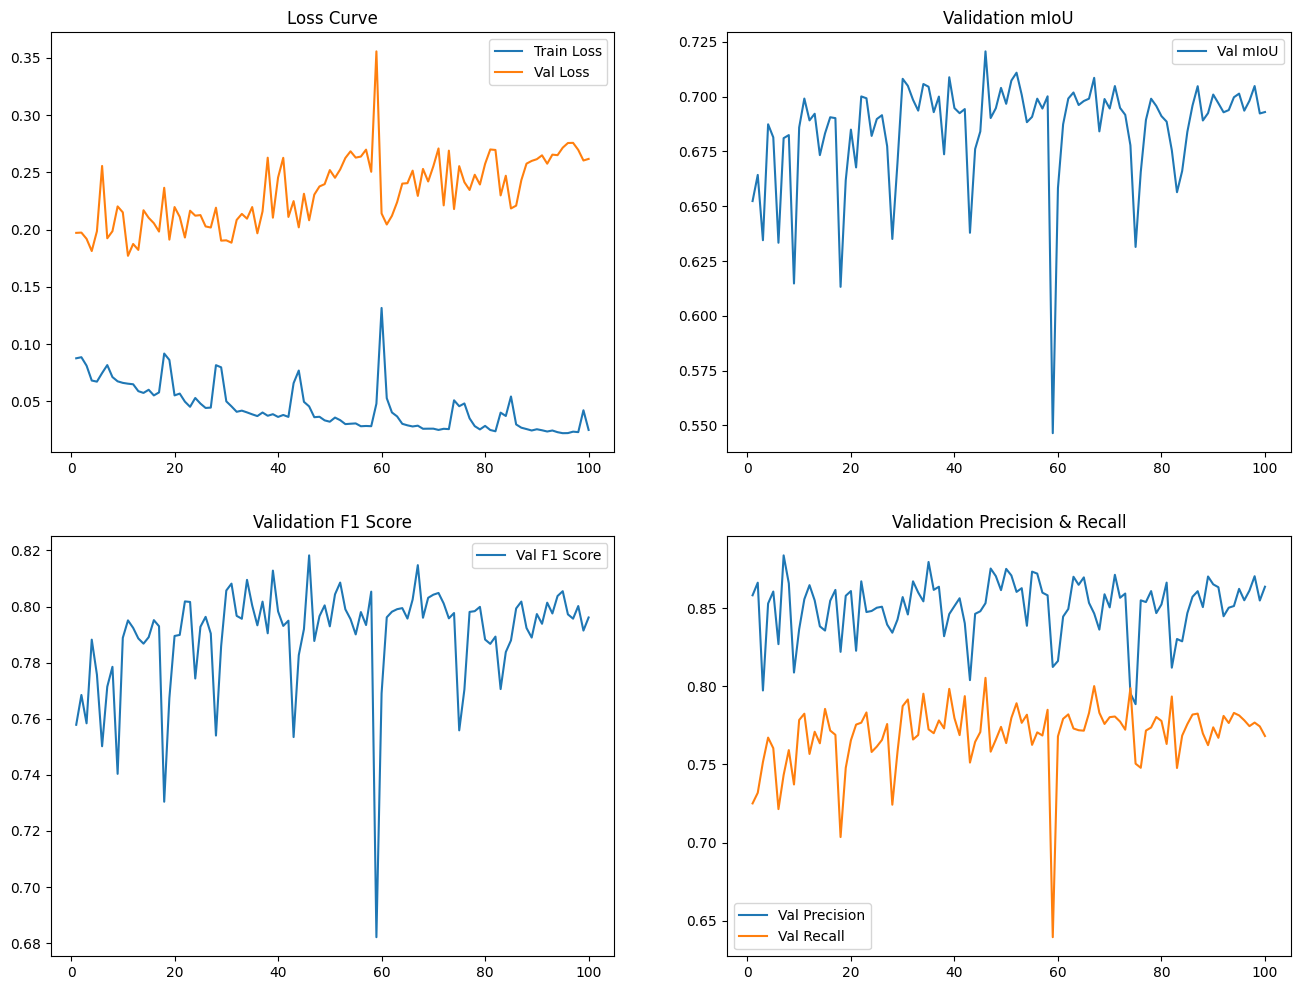

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history['train_loss']) + 1)

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(epochs, history['train_loss'], label='Train Loss')
plt.plot(epochs, history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(2, 2, 2)
plt.plot(epochs, history['val_miou'], label='Val mIoU')
plt.legend()
plt.title('Validation mIoU')

plt.subplot(2, 2, 3)
plt.plot(epochs, history['val_f1'], label='Val F1 Score')
plt.legend()
plt.title('Validation F1 Score')

plt.subplot(2, 2, 4)
plt.plot(epochs, history['val_precision'], label='Val Precision')
plt.plot(epochs, history['val_recall'], label='Val Recall')
plt.legend()
plt.title('Validation Precision & Recall')

plt.show()
